# Introduction

Let's start our exploration of how CVE Details create types by examining this sample table of one of CVE Details 13 types. Specifically, this table refers to all entries labeled [**SQL Injection** in 2016](http://www.cvedetails.com/vulnerability-list/year-2016/opsqli-1/sql-injection.html). 

In [2]:
#using panda 
import pandas as pd
import csv
import numpy as np
import math

#We specify the cwe_id column type is str, otherwise pandas will infer it as a float adding a misleading decimal.
cved_df = pd.read_csv("cve_details_sql_injection_2016.csv",dtype={'cwe_id': str})
cved_df['month'] = [d[5:7] for d in cved_df['published_date']]
cved_df
#np.unique(cved_df['vulnerability_type'])

,cve_id,cwe_id,n_exploits,vulnerability_type,published_date,updated_date,description,score,gained_access_level,access,complexity,authentication,conf,integ,avail,month
0,CVE-2016-1000217,89,NaN,Sql,2016-10-06,2016-12-22,Zotpress plugin for WordPress SQLi in zp_get_a...,7.5,None,Remote,Low,Not required,Partial,Partial,Partial,10
1,CVE-2016-1000125,89,NaN,Sql,2016-10-06,2017-01-19,Unauthenticated SQL Injection in Huge-IT Catal...,7.5,None,Remote,Low,Not required,Partial,Partial,Partial,10
2,CVE-2016-1000124,89,NaN,Sql,2016-10-06,2016-11-28,Unauthenticated SQL Injection in Huge-IT Portf...,7.5,None,Remote,Low,Not required,Partial,Partial,Partial,10
3,CVE-2016-1000123,89,NaN,Sql,2016-10-06,2016-12-22,Unauthenticated SQL Injection in Huge-IT Video...,7.5,None,Remote,Low,Not required,Partial,Partial,Partial,10
4,CVE-2016-1000122,89,NaN,Sql XSS,2016-10-27,2016-12-22,XSS and SQLi in Huge IT Joomla Slider v1.0.9 e...,6.5,None,Remote,Low,Single system,Partial,Partial,Partial,10
5,CVE-2016-1000120,89,NaN,Sql XSS,2016-10-27,2016-12-22,SQLi and XSS in Huge IT catalog extension v1.0...,6.5,None,Remote,Low,Single system,Partial,Partial,Partial,10
6,CVE-2016-1000116,79,NaN,Sql XSS,2016-10-21,2016-11-28,Huge-IT Portfolio Gallery manager v1.1.5 SQL I...,6.5,None,Remote,Low,Single system,Partial,Partial,Partial,10
7,CVE-2016-1000115,79,NaN,Sql XSS,2016-10-21,2016-12-22,Huge-IT Portfolio Gallery manager v1.1.5 SQL I...,6.5,None,Remote,Low,Single system,Partial,Partial,Partial,10
8,CVE-2016-1000113,89,NaN,Sql XSS,2016-10-06,2016-11-28,XSS and SQLi in huge IT gallery v1.1.5 for Joomla,7.5,None,Remote,Low,Not required,Partial,Partial,Partial,10
9,CVE-2016-1000000,89,NaN,Sql,2016-10-06,2017-01-17,Ipswitch WhatsUp Gold 16.4.1 WrFreeFormText.as...,6.5,None,Remote,Low,Single system,Partial,Partial,Partial,10


Notice that the column **vulnerability_type** not only includes sql injection. It may also cite other identified types out of the 13. For instance, row 4 value is **SQL XSS**, indicating the entry is both of **SQL** and **XSS** types. 

**Important**: Entries labeled with multiple types **WILL** appear, accordingly, on the **tables**. A combination of tables must be done carefully when collecting textual descriptions, to avoid redundance! 

# Analysis 

To begin the analysis, let's consider how cwe ids, which by definition group vulnerabilities, are distributed across the type for this year and SQL Injection. Notice a cwe_id may or not occur, but the type is always defined. cve_id's, always occur, hence defining the upper bound a vulnerability type could had.

In [5]:
vulnerability_type_histogram = cved_df.groupby(by=['vulnerability_type'])['cwe_id','cve_id'].count()
vulnerability_type_histogram


,cwe_id,cve_id
vulnerability_type,,
+Priv Dir. Trav.,0,1
Dir. Trav.,69,80
Dir. Trav. +Info,4,4
Dir. Trav. Bypass,3,6
Dir. Trav. File Inclusion,3,3
DoS Sql,2,2
Exec Code Dir. Trav.,4,4
Exec Code Sql,118,118
Exec Code Sql +Info,2,2


We can note some combinations of type occur much more frequently than others.

Let's explore further the vulnerability types proposed by CVE Details, by not only counting the number of cwe id's per vulnerability type, but also **what** are the cwe_id'per type. Out of curiosity, let's also include the number of exploits that were reported. 

In [6]:
vulnerability_type_histogram = cved_df.groupby(by=['vulnerability_type','cwe_id'])['cve_id','n_exploits'].count()
vulnerability_type_histogram
vulnerability_list = np.unique(cved_df['vulnerability_type'])
vulnerability_by_month = cved_df.groupby(by=['vulnerability_type','month'])['cve_id'].count()
vulnerability_by_month


vulnerability_type         month
+Priv Dir. Trav.           10        1
Dir. Trav.                 01       21
                           02        5
                           04        8
                           05        2
                           06        9
                           07        5
                           08        7
                           09        4
                           10        6
                           11        4
                           12        9
Dir. Trav. +Info           06        1
                           07        1
                           09        1
                           12        1
Dir. Trav. Bypass          01        3
                           02        1
                           07        1
                           12        1
Dir. Trav. File Inclusion  12        3
DoS Sql                    11        2
Exec Code Dir. Trav.       01        1
                           04        1
                           06  

A pattern emerges in the construction of the types: For vulnerability types with a higher number of cwe entries, this **higher number is led by a single cwe id**. This is the case for 3 vulnerability types in the table above: **Dir.Trav.** being led by cwe_id **22**, **Exec Code Sql** being led by cwe_id **89**, and vulnerability type **SQL** on cwe_id **89**. 

Additionally, we should remember that the column **vulnerability type** can be a combination of 1 or more types of the 13 proposed by CVE Details. Specifically, **Exec Code Sql** actually refers to the type **Code Execution** and the type **SQL**. 

We can also observe just the distribution of cwe_id's reported for SQL table for 2016.

In [7]:
vulnerability_histogram = cved_df.groupby(by=['cwe_id'])['cve_id'].count()
vulnerability_histogram

cwe_id
200      7
22      77
264      2
434      1
77       2
79       4
89     178
Name: cve_id, dtype: int64

# Visualisation

## Vulnerability type histogram

In [4]:
#imports for histogram
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import Range1d
from bokeh.io import output_notebook
from bokeh.charts import Bar
import matplotlib.pyplot as plot
from datetime import datetime
output_notebook() 

Loading BokehJS ...

In [9]:
#creating a histogram for vulnerability types by creating a dictionary
vulnerability_type_histogram = cved_df.groupby(by=['vulnerability_type'])['cve_id'].count()
data = {}
data['Entries'] = vulnerability_type_histogram
#saving in dictionary for sorting and visualising
df_data = pd.DataFrame(data).sort_values(by='Entries', ascending=True)
series = df_data.loc[:,'Entries']

p = figure(width=800, y_range=series.index.tolist(), title="Histogram of Vulnerability Types from CVE Details")

p.xaxis.axis_label = 'Frequency'
p.xaxis.axis_label_text_font_size = '10pt'
p.xaxis.major_label_text_font_size = '8pt'

p.yaxis.axis_label = 'Vulnerability Type Combinations of the 13 Types'
p.yaxis.axis_label_text_font_size = '10pt'
p.yaxis.major_label_text_font_size = '8pt'

j = 1
for k,v in series.iteritems():
  
  #Print fields, values, orders
  #print (k,v,j) 
  p.rect(x=v/2, y=j, width=abs(v), height=0.4,
    width_units="data", height_units="data")
  j += 1


The histogram below represents vulnerability types as mentioned in the Cve Details database. The vulnerability types are explained below:

- **Dir. Trav.** stands for Directory Traversal
- **Dir. Trav. Bypass** stands for Directory Traversal Bypass
- **Dir. Trav. File Inclusion** stands for Directory Traversal File Inclusion
- **DoS Sql** stands for Denial of Service attack using Structured Query Language
- **Exec Code Dir. Trav.** stands for Execution of arbitrary code causing a Directory Traversal vulnerability
- **Exec code Sql** stands for Execution of arbitrary code causing a Structured Query Language vulnerability
- **Exec Code Sql +Info** stands for Execution of arbitrary code causing a Structured Query Language vulnerability or access to sensitive information
- **Sql** stands for Structured Query language vulnerability
- **Sql +Info** stands for a Structured Query Language vulnerability or access to sensitive information
- **Sql Bypass +Info** stands for a Structured Query Language Bypass vulnerability or access to sensitive information
- **Sql XSS** stands for Cross-site scripting(XSS) vulnerability in SQL

In [10]:
show(p)

We created this histogram to gain insights into the the number of occurances of each of the vulnerability types. On analysis we can see that **Exec. code Sql** is the most frequent type of attack, followed by **Dir. Trav.** and **Sql types** which qualify to the three most frequent vulnerability types. 

## CWE ID count histogram

In [11]:
#creating a histogram for cwe ID types by creating a dictionary
data = {}
data['Entries'] = vulnerability_histogram
#saving in dictionary for sorting and visualising
df_data = pd.DataFrame(data).sort_values(by='Entries', ascending=True)
series = df_data.loc[:,'Entries']

p = figure(width=800, y_range=series.index.tolist(), title="Histogram of CWE IDs from CVE Details")

p.xaxis.axis_label = 'Frequency'
p.xaxis.axis_label_text_font_size = '10pt'
p.xaxis.major_label_text_font_size = '8pt'

p.yaxis.axis_label = 'CWE ID'
p.yaxis.axis_label_text_font_size = '10pt'
p.yaxis.major_label_text_font_size = '8pt'

j = 1
for k,v in series.iteritems():
  
  #Print fields, values, orders
  #print (k,v,j) 
  p.rect(x=v/2, y=j, width=abs(v), height=0.4,
    width_units="data", height_units="data")
  j += 1
show(p)

The histogram above shows the frequency of CWE IDs of the CVE Details database. The most frequent CWE IDs are **89** and **22** which account for more than 90% of the entries.

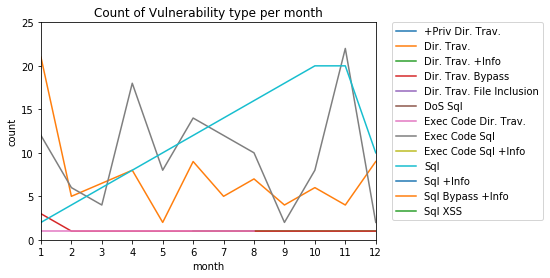

In [24]:
color_map = {
'+Priv Dir. Trav.': 'red',
'Dir. Trav.': 'green',
'Dir. Trav. +Info': 'yellow',
'Dir. Trav. Bypass': 'violet',
'Dir. Trav. File Inclusion': 'indigo',
'DoS Sql': 'brown',
'Exec Code Dir. Trav.': 'black',
'Exec Code Sql': 'blue',
'Exec Code Sql +Info': 'orange',
'Sql': 'olive',
'Sql +Info' : 'navy',
'Sql Bypass +Info' : 'firebrick',
'Sql XSS' : '#F4A582'
}

def create_multi_line(vul):
    map_data = {}
    for v in vul.items():
        tuple_0 = v[0]
        if tuple_0[0] in map_data:
            map_data[tuple_0[0]].append((tuple_0[1],v[1]))
        else:
            map_data[tuple_0[0]] =[]
            map_data[tuple_0[0]].append((tuple_0[1],v[1]))
    vul_plot = plot.subplot(111)
    for k,v in map_data.items():
        vul_plot.plot([int(i[0]) for i in v],[int(j[1]) for j in v] , label=k)
        vul_plot.set_ylabel('count')
        vul_plot.set_xlabel('month')

    vul_plot.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)
    vul_plot.set_title("Count of Vulnerability type per month")
    vul_plot.set_autoscaley_on(False)
    vul_plot.set_ylim([0,25])
    vul_plot.set_autoscalex_on(False)
    vul_plot.set_xlim([1,12])
    vul_plot.xaxis.set_ticks([1,2,3,4,5,6,7,8,9,10,11,12])
    plot.show()


#We specify the cwe_id column type is str, otherwise pandas will infer it as a float adding a misleading decimal.
cved_df = pd.read_csv("cve_details_sql_injection_2016.csv")
cved_df['month'] = [d[5:7] for d in cved_df['published_date']]
vulnerability_type_histogram = cved_df.groupby(by=['vulnerability_type','cwe_id'])['cve_id','n_exploits'].count()
vulnerability_type_histogram
data = cved_df.groupby(by=['vulnerability_type','month'])['cve_id'].count()


create_multi_line(vul)

